<a href="https://colab.research.google.com/github/Phuc-Homoji/BaiTapAI/blob/main/10_monan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
import os

In [5]:
train_data = '/content/drive/MyDrive/AI/CNN_10monan/Train'
val_data  =  '/content/drive/MyDrive/AI/CNN_10monan/Validation'
test_data =  '/content/drive/MyDrive/AI/CNN_10monan/Test'

In [6]:
from keras.engine.data_adapter import train_validation_split
#preprocessing
data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(200, 200),
                        batch_size=30,
                        class_mode="categorical")

val_input = data_scale.flow_from_directory(val_data,
                        target_size=(200, 200),
                        batch_size=30,
                        class_mode="categorical")

test_input = data_scale.flow_from_directory(test_data,
                        target_size=(200, 200),
                        batch_size=30,
                        class_mode="categorical")

Found 291 images belonging to 10 classes.
Found 99 images belonging to 10 classes.
Found 48 images belonging to 10 classes.


In [7]:
#setting lable
class_food = ['Bánh chưng', 'Rau Muống Xào', 'Phở', 'Mì gói', 'Cơm Tấm', 'Bún Đậu Mắm tôm', 'Bánh Xèo', 'Bánh Ướt', 'Bánh Mì','Bánh Bao']

print("labels: ", class_food)
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

labels:  ['Bánh chưng', 'Rau Muống Xào', 'Phở', 'Mì gói', 'Cơm Tấm', 'Bún Đậu Mắm tôm', 'Bánh Xèo', 'Bánh Ướt', 'Bánh Mì', 'Bánh Bao']
match class:  {'BanhBao': 0, 'BanhChung': 1, 'BanhMi': 2, 'BanhUot': 3, 'BanhXeo': 4, 'BunDauMamTom': 5, 'ComTam': 6, 'MiGoi': 7, 'Pho': 8, 'RauMuongXao': 9}
Tổng cộng:  10


In [8]:
#MODEL CNN
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 4
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 32)        0

In [9]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
money_train = model.fit(train_input,batch_size=10,epochs=50,verbose=1,validation_data=val_input)

Epoch 1/50
10/10 [==============================] - 24s 2s/step - loss: 27.0989 - accuracy: 0.1100 - val_loss: 2.3118 - val_accuracy: 0.1010
Epoch 2/50
10/10 [==============================] - 22s 2s/step - loss: 2.4381 - accuracy: 0.1134 - val_loss: 2.3006 - val_accuracy: 0.1616
Epoch 3/50
10/10 [==============================] - 22s 2s/step - loss: 2.2950 - accuracy: 0.1306 - val_loss: 2.2974 - val_accuracy: 0.1616
Epoch 4/50
10/10 [==============================] - 22s 2s/step - loss: 2.2725 - accuracy: 0.1375 - val_loss: 2.2552 - val_accuracy: 0.1919
Epoch 5/50
10/10 [==============================] - 22s 2s/step - loss: 2.1916 - accuracy: 0.1409 - val_loss: 2.1557 - val_accuracy: 0.2121
Epoch 6/50
10/10 [==============================] - 22s 2s/step - loss: 2.0718 - accuracy: 0.1890 - val_loss: 2.0647 - val_accuracy: 0.2121
Epoch 7/50
10/10 [==============================] - 22s 2s/step - loss: 1.9785 - accuracy: 0.2405 - val_loss: 2.0279 - val_accuracy: 0.2222
Epoch 8/50
10/10 [=

In [13]:
model.save('/content/drive/MyDrive/AI/CNN_10monan/food.h5')

Loai do an: Phở


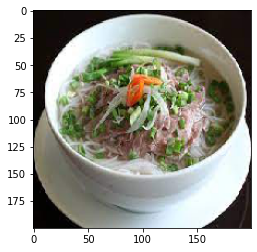

In [19]:
pic = image.load_img('/content/drive/MyDrive/AI/CNN_10monan/Test/Pho/images (7).jpg', target_size=(200,200)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,200,200,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loai do an: Bánh Bao")
if guess[0]==1:
  print("Loai do an: Bánh Chưng")
if guess[0]==2:
  print("Loai do an: Bánh Mì")
if guess[0]==3:
  print("Loai do an: Bánh Ướt")
if guess[0]==4:
  print("Loai do an: Bánh Xèo")
if guess[0]==5:
  print("Loai do an: Bún Đậu Mắm tôm")
if guess[0]==6:
  print("Loai do an: Cơm Tấm")
if guess[0]==7:
  print("Loai do an: Mì Gói")
if guess[0]==8:
  print("Loai do an: Phở")
if guess[0]==9:
  print("Loai do an: Rau Muống Xào")